In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [2]:
df = pd.read_csv('hog_dataset.csv')

In [3]:
df

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12
0,478229345,2,2,2,1.00,"35,083.33","17,541.67","36,754.07","18,377.03","4,871.25","1,428.90",0.00,"8,680.00",0.00,"4,800.00","2,748.48","1,725.00","1,625.00",0.00,"9,893.00",982.44
1,824935596,2,2,1,2.00,"42,666.67","21,333.33","30,000.70","15,000.35","6,984.29",0.00,0.00,"7,933.00",448.00,"9,303.20","1,593.44","2,690.00",750.00,0.00,0.00,298.77
2,549385244,2,1,1,1.00,"15,000.00","15,000.00","5,816.08","5,816.08",935.32,0.00,500.00,522.45,50.00,0.00,"1,411.30","1,060.00",600.00,0.00,433.00,304.00
3,64338930,2,1,1,1.00,"65,000.00","65,000.00","33,049.61","33,049.61","4,334.33",913.63,200.00,"15,000.00",0.00,0.00,368.05,"1,000.00","3,948.50","5,000.00","2,035.10",250.00
4,635779227,2,2,2,1.00,"30,883.33","15,441.67","34,307.25","17,153.62","5,897.46",0.00,"5,450.00","12,175.00","1,909.80","2,000.00",771.00,"1,384.00",900.00,0.00,"2,814.50","1,005.48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21315,57618153,94,1,1,1.00,"23,000.00","23,000.00","6,548.56","6,548.56",64.95,0.00,0.00,"2,900.00",0.00,"1,010.00",73.61,"1,100.00","1,400.00",0.00,0.00,0.00
21316,551737923,94,1,1,1.00,"42,621.50","42,621.50","32,548.35","32,548.35",0.00,0.00,0.00,"5,826.00",0.00,0.00,0.00,722.00,"25,780.00",0.00,0.00,220.35
21317,188896348,94,3,1,3.00,"11,800.00","3,933.33","15,831.70","5,277.23","4,846.14",0.00,"4,610.00","1,542.00",945.25,0.00,0.00,0.00,"3,658.00",0.00,0.00,230.31
21318,127611813,94,3,3,1.00,"87,149.67","29,049.89","22,938.68","7,646.23","3,078.72","1,578.72",0.00,947.78,738.88,0.00,"3,341.76","2,120.00","2,814.64","3,552.00",0.00,"4,766.19"


## Univariate Analysis

### Province

Number of surveys per province:

In [4]:
#Province code map
prov_cod = {
    2: 'CABA',
    6: 'Buenos Aires',
    10: 'Catamarca',
    14: 'Córdoba',
    18: 'Corrientes',
    22: 'Chaco',
    26: 'Chubut',
    30: 'Entre Ríos',
    34: 'Formosa',
    38: 'Jujuy',
    42: 'La Pampa',
    46: 'La Rioja',
    50: 'Mendoza',
    54: 'Misiones',
    58: 'Neuquén',
    62: 'Río Negro',
    66: 'Salta',
    70: 'San Juan',
    74: 'San Luís',
    78: 'Santa Cruz',
    82: 'Santa Fe',
    86: 'Santiago del Estero',
    90: 'Tucumán',
    94: 'Tierra del Fuego'
}

In [5]:
df['prov_name'] = df.provincia.map(prov_cod)

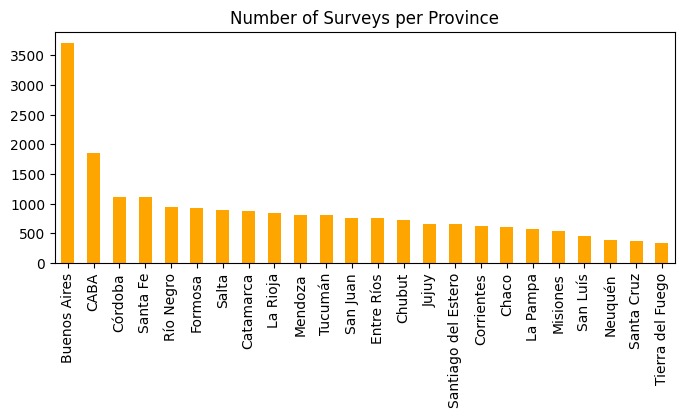

In [6]:
df.prov_name.value_counts().plot(kind='bar', xlabel='', title='Number of Surveys per Province', color='orange', figsize=(8,3))
plt.show()

We'll check population against number of surveys per province

In [7]:
#Province population map
prov_pop = {
    'CABA':2890151,
    'Buenos Aires':15625084,
    'Catamarca':367828,
    'Córdoba':3308876,
    'Corrientes':992595,
    'Chaco':1055259,
    'Chubut':509108,
    'Entre Ríos':1235994,
    'Formosa':530162,
    'Jujuy':673307,
    'La Pampa':318951,
    'La Rioja':333642,
    'Mendoza':1738929,
    'Misiones':1101593,
    'Neuquén':551266,
    'Río Negro':638645,
    'Salta':1214441,
    'San Juan':681055,
    'San Luís':432310,
    'Santa Cruz':273964,
    'Santa Fe':3194537,
    'Santiago del Estero':874006,
    'Tierra del Fuego':127205,
    'Tucumán':1448188
}
#source: https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2

In [8]:
prov_df = (                         #creates df for population and number of surveys
    pd.DataFrame(prov_pop.items(), columns=['prov_name', 'population'])
        .join(df.prov_name.value_counts(normalize=True), on='prov_name', how='outer')
        .set_index('prov_name') )
prov_df.poblacion = prov_df.population / prov_df.population.sum() #population values normalization
prov_df.rename(columns={'proportion': 'surveys'}, inplace=True) 
prov_df.sort_values('population', ascending=False, inplace=True) #sort by population

C:\Users\mauro\AppData\Local\Temp\ipykernel_8716\231569954.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prov_df.poblacion = prov_df.population / prov_df.population.sum() #population values normalization


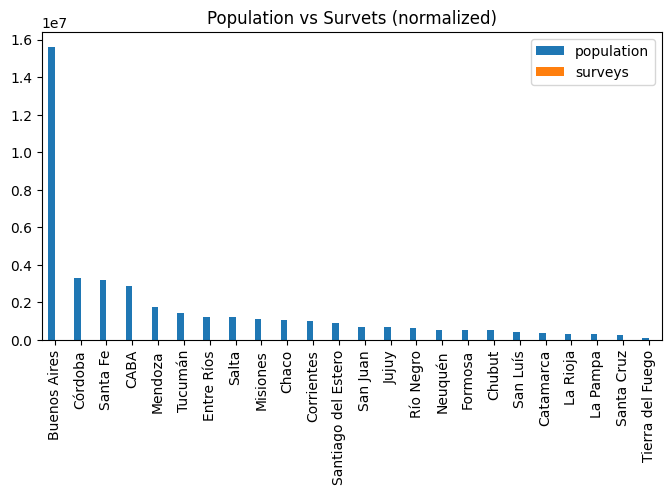

In [9]:
prov_df.plot(kind='bar', title='Population vs Survets (normalized)', xlabel='', figsize=(8,4))
plt.show()

### Household Members

Variables distributions:

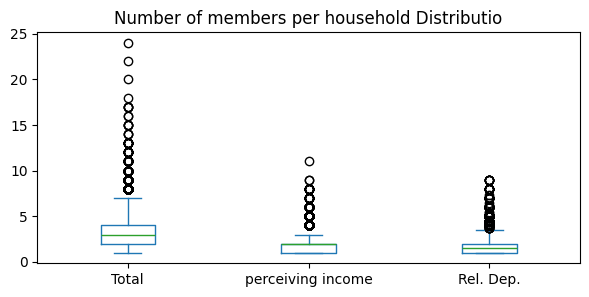

In [10]:
df[['cantmiem', 'cantping', 'reldep']].rename(columns={'cantmiem':'Total', 'cantping':'perceiving income', 'reldep':'Rel. Dep.'}) \
    .plot(kind='box', title='Number of members per household Distributio', figsize=(7,3))
plt.show()

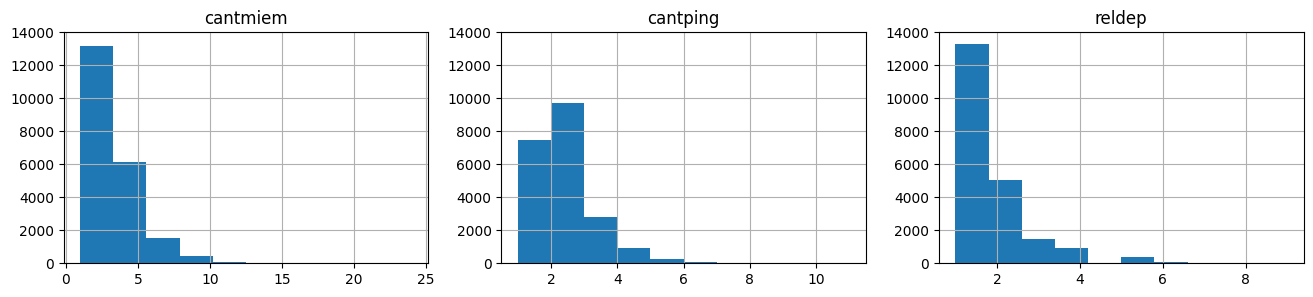

In [11]:
fig, ax = plt.subplots(1,3, figsize=(16,3))
for i, col in enumerate(['cantmiem', 'cantping', 'reldep']):
    df[col].hist(ax=ax[i])
    ax[i].set(title=col, ylim=(0,14000))
plt.show()

descriptive:

In [12]:
miem_stats = df[['cantmiem', 'cantping', 'reldep']].describe()
miem_stats

,cantmiem,cantping,reldep
count,"21,320.00","21,320.00","21,320.00"
mean,3.19,1.94,1.74
std,1.85,0.95,0.98
min,1.00,1.00,1.00
25%,2.00,1.00,1.00
50%,3.00,2.00,1.50
75%,4.00,2.00,2.00
max,24.00,11.00,9.00


### Income

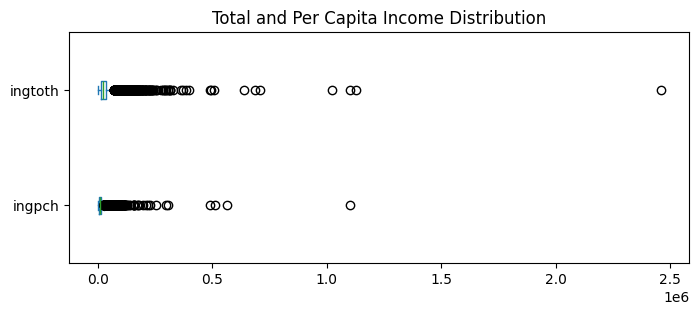

In [13]:
df[['ingpch', 'ingtoth']].plot(kind='box', figsize=(8,3), vert=False)
plt.title('Total and Per Capita Income Distribution')
plt.show()

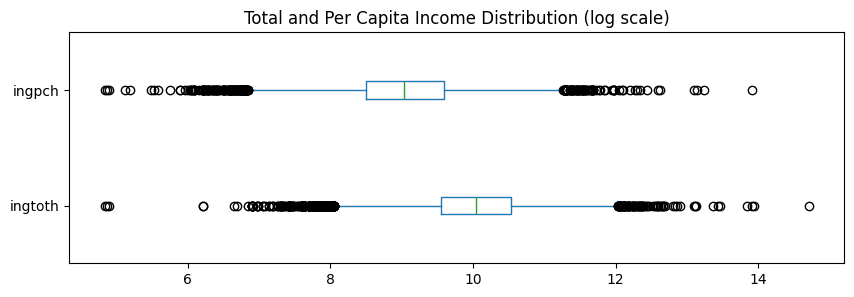

In [14]:
df[['ingtoth', 'ingpch']].apply(lambda x: np.log(x+1)).plot(kind='box', figsize=(10,3), vert=False)
plt.title('Total and Per Capita Income Distribution (log scale)')
plt.show()

descriptive:

In [15]:
df[['ingtoth', 'ingpch']].describe(percentiles=[.25,.5,.75,.9,.99])

,ingtoth,ingpch
count,"21,320.00","21,320.00"
mean,"30,138.45","11,995.65"
std,"34,006.07","15,681.83"
min,125.00,125.00
25%,"14,000.00","4,900.00"
50%,"23,055.42","8,348.12"
75%,"37,829.83","14,771.32"
90%,"57,601.50","24,261.43"
99%,"121,573.99","56,868.67"
max,"2,461,500.00","1,100,000.00"


##### Above and below 99 percentil distribution (individually calculated):

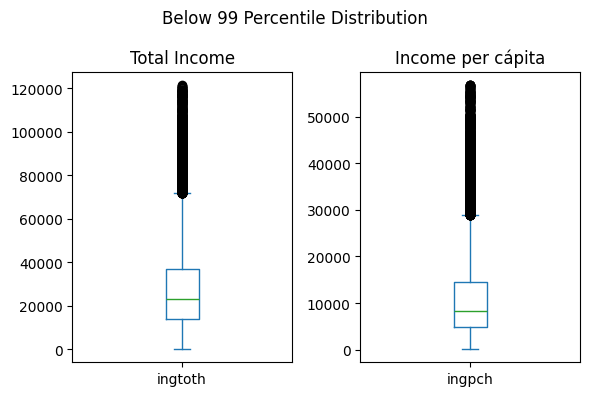

In [16]:
fig, ax = plt.subplots(1,2, figsize=(6,4))

df.loc[df.ingtoth < df.ingtoth.quantile(.99), ['ingtoth']].plot(kind='box', ax=ax[0])
ax[0].set(title='Total Income')

df.loc[df.ingpch < df.ingpch.quantile(.99), ['ingpch']].plot(kind='box', ax=ax[1])
ax[1].set(title='Income per cápita')

plt.suptitle('Below 99 Percentile Distribution')
plt.tight_layout()

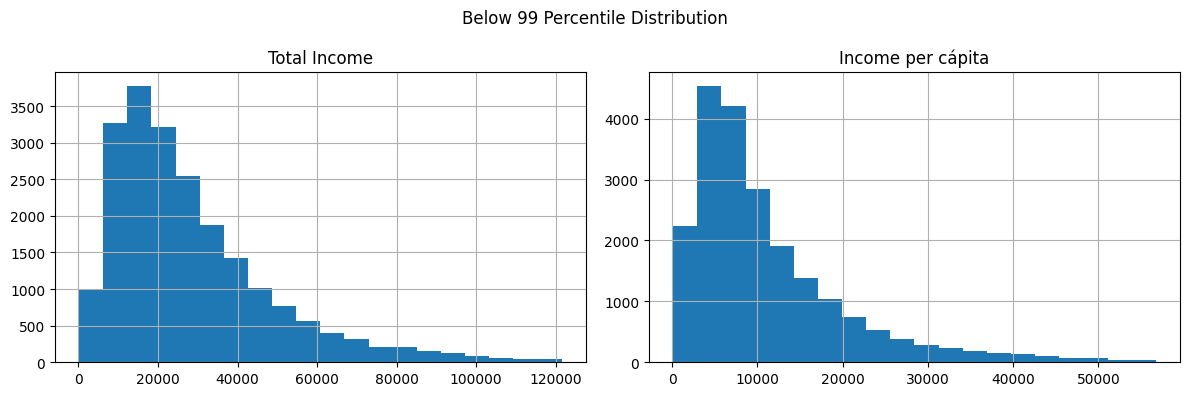

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

df.loc[df.ingtoth < df.ingtoth.quantile(.99), ['ingtoth']].hist(bins=20, ax=ax[0])
ax[0].set(title='Total Income')

df.loc[df.ingpch < df.ingpch.quantile(.99), ['ingpch']].hist(bins=20, ax=ax[1])
ax[1].set(title='Income per cápita')

plt.suptitle('Below 99 Percentile Distribution')
plt.tight_layout()

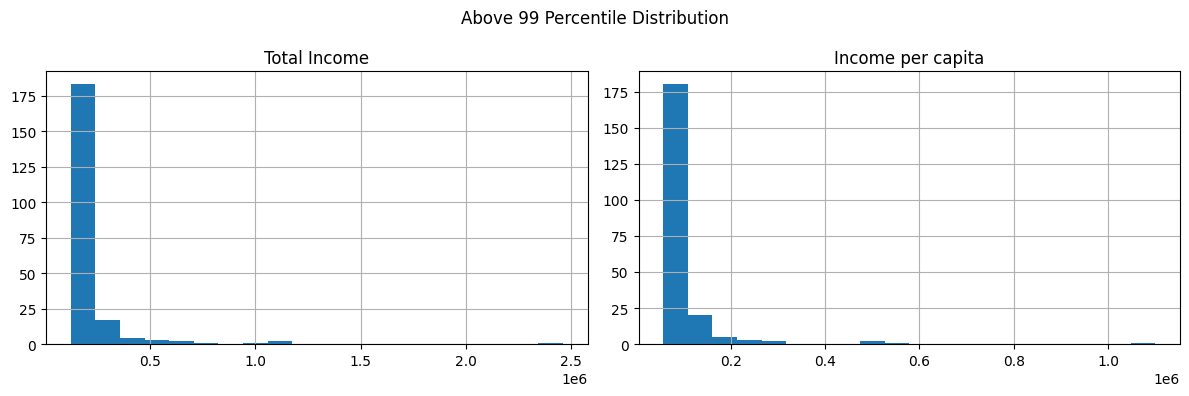

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
df.loc[df.ingtoth >= df.ingtoth.quantile(.99), ['ingtoth']].hist(bins=20, ax=ax[0])
ax[0].set(title='Total Income')
df.loc[df.ingpch >= df.ingpch.quantile(.99), ['ingpch']].hist(bins=20, ax=ax[1])
ax[1].set(title='Income per capita')
plt.suptitle('Above 99 Percentile Distribution')
plt.tight_layout()

### Expenses

In [19]:
df.gastot.describe(percentiles=[.25,.5,.75,.9,.99])

count    21,320.00
mean     22,304.20
std      19,204.72
min          51.96
25%      10,340.39
50%      16,927.99
75%      28,065.84
90%      44,323.70
99%      94,461.82
max     374,616.66
Name: gastot, dtype: float64

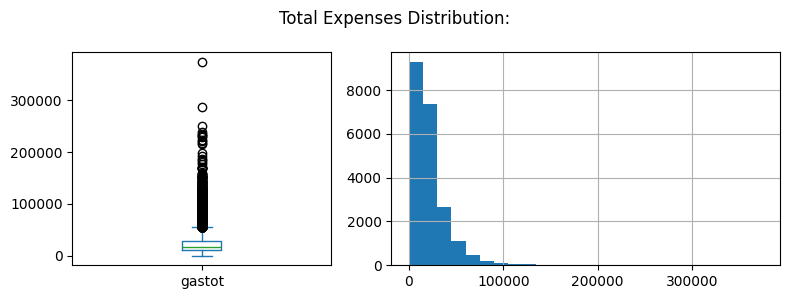

In [20]:
fig, ax = plt.subplots(1,2, width_ratios=[2,3], figsize=(8,3))
df.gastot.plot(kind='box', ax=ax[0])
df.gastot.hist(bins=25, ax=ax[1])
ax[1].set(xticks=range(0,300001, 100000))
plt.suptitle('Total Expenses Distribution:')
plt.tight_layout()

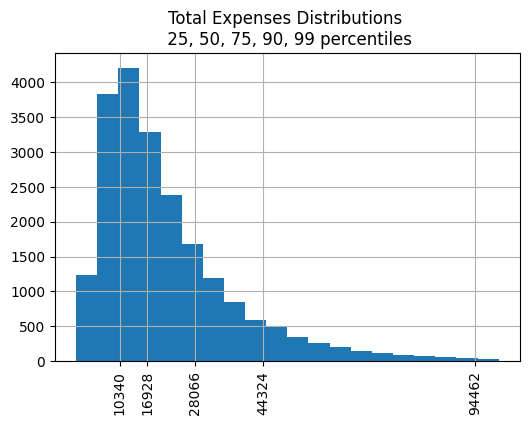

In [21]:
df.gastot[df.gastot < 100000].hist(bins=20, figsize=(6,4))
plt.xticks(df.gastot.describe(percentiles=[.25,.5,.75,.9,.99]).iloc[4:9], rotation=90)
plt.title('Total Expenses Distributions \n 25, 50, 75, 90, 99 percentiles')
plt.show()

#### Type of Expenses

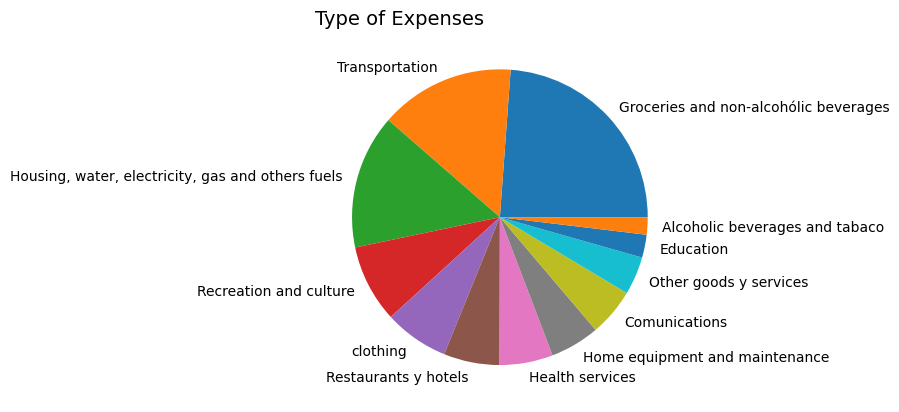

In [22]:
services_name_map = {'gc_01':'Groceries and non-alcohólic beverages','gc_02':'Alcoholic beverages and tabaco','gc_03':'clothing','gc_04':'Housing, water, electricity, gas and others fuels','gc_05':'Home equipment and maintenance','gc_06':'Health services','gc_07':'Transportation','gc_08':'Comunications','gc_09':'Recreation and culture','gc_10':'Education','gc_11':'Restaurants y hotels','gc_12':'Other goods y services'}
df[['gc_01', 'gc_02', 'gc_03', 'gc_04', 'gc_05', 'gc_06', 'gc_07', 'gc_08', 'gc_09', 'gc_10', 'gc_11', 'gc_12']] \
    .rename(columns=services_name_map).sum().sort_values(ascending=False) \
    .plot(kind='pie')
plt.title('Type of Expenses', loc='left', fontsize=14)
plt.show()

## Multivariate Analysis

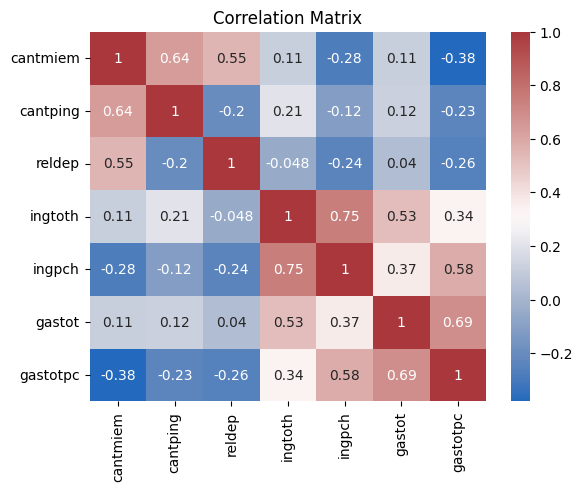

In [23]:
sns.heatmap(df[['cantmiem', 'cantping', 'reldep', 'ingtoth', 'ingpch', 'gastot', 'gastotpc']].corr(), annot=True, cmap='vlag')
plt.title('Correlation Matrix')
plt.show()

### Province against Expenses/Income/Members

In [24]:
df_per_prov = df.groupby('prov_name')[['cantmiem', 'cantping', 'reldep', 'ingtoth','ingpch', 'gastot', 'gastotpc']].mean()
df_per_prov.head()

,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc
prov_name,,,,,,,
Buenos Aires,3.02,1.83,1.76,"30,371.80","12,329.68","23,450.96","9,524.84"
CABA,2.50,1.75,1.45,"42,931.99","20,704.45","35,300.89","17,317.26"
Catamarca,3.48,2.11,1.75,"28,353.53","9,893.48","18,882.01","7,155.74"
Chaco,3.44,1.96,1.91,"19,483.62","6,755.51","11,830.40","4,198.24"
Chubut,2.94,1.66,1.89,"40,102.13","16,759.48","22,723.05","9,630.58"


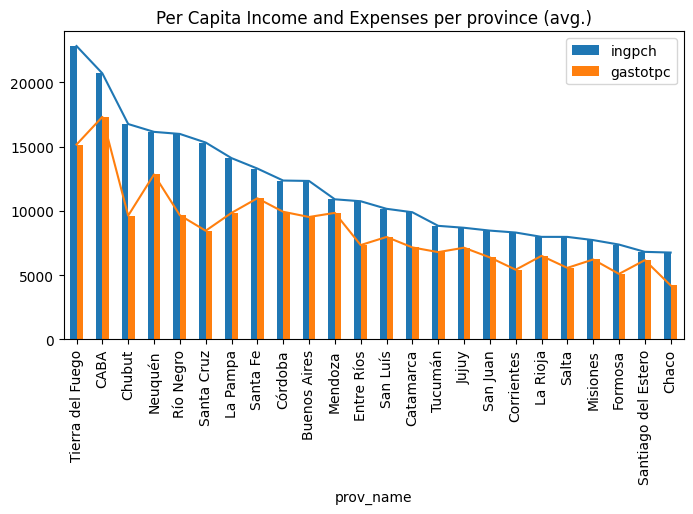

In [25]:
df_per_prov[['ingpch', 'gastotpc']].sort_values('ingpch', ascending=False).plot(kind='bar', figsize=(8,4))
plt.title('Per Capita Income and Expenses per province (avg.)')
plt.plot(df_per_prov[['ingpch', 'gastotpc']].sort_values('ingpch', ascending=False))
plt.show()

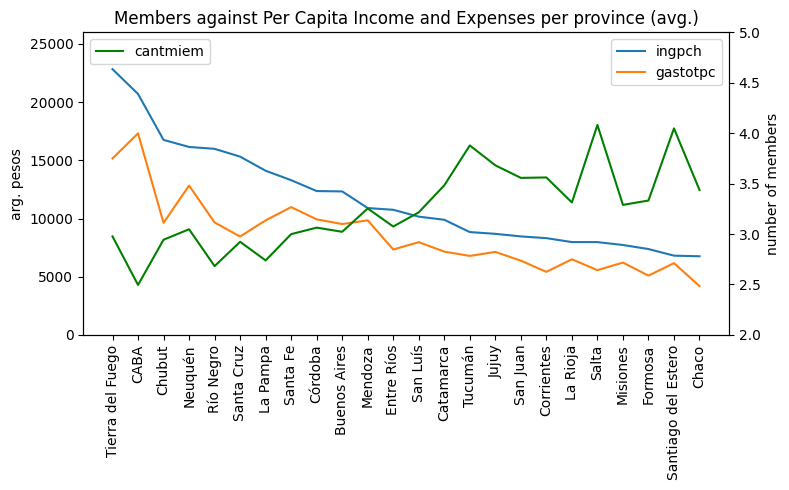

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
plt.xticks(rotation=90)

ax.plot(df_per_prov[['ingpch', 'gastotpc']].sort_values('ingpch', ascending=False))
ax.legend(['ingpch', 'gastotpc'])
ax.set(ylim=(0, 26000), ylabel='arg. pesos')

ax2 = ax.twinx()
ax2.plot(df_per_prov[['ingpch', 'cantmiem']].sort_values('ingpch', ascending=False)['cantmiem'], color='green')
ax2.set(ylim=(2,5), ylabel='number of members')
ax2.legend(['cantmiem'], loc=2)

plt.title('Members against Per Capita Income and Expenses per province (avg.)')
plt.tight_layout()

### Income and Expenses

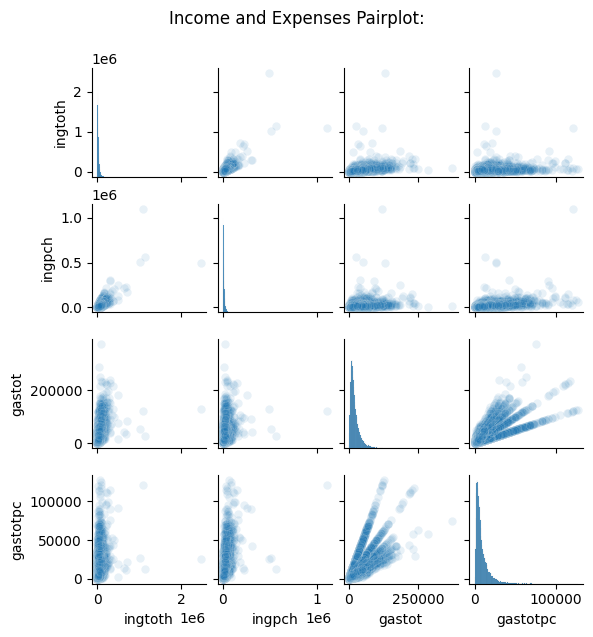

In [27]:
g = sns.pairplot(df[['ingtoth', 'ingpch', 'gastot', 'gastotpc']], kind='scatter', height=1.5, plot_kws={'alpha': 0.1})
g.fig.suptitle('Income and Expenses Pairplot:', y=1.05)
plt.show()

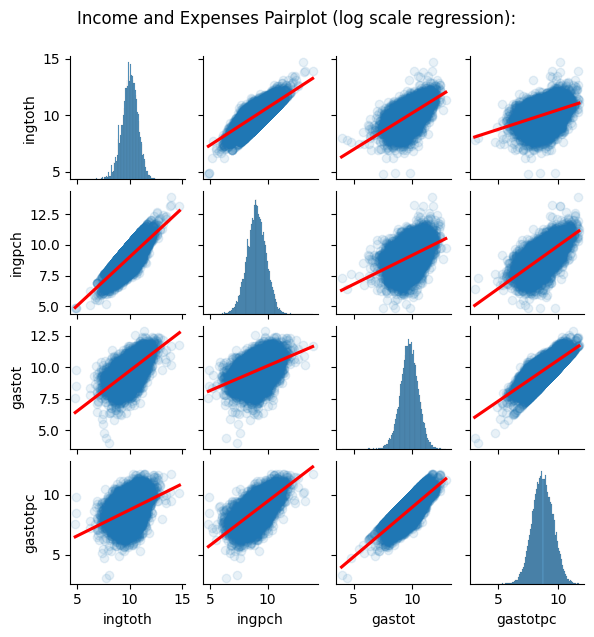

In [28]:
g = sns.pairplot(df[['ingtoth', 'ingpch', 'gastot', 'gastotpc']].apply(lambda x: np.log(x+1)), kind='reg', height=1.5, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
g.fig.suptitle('Income and Expenses Pairplot (log scale regression):', y=1.05)
plt.show()

### Members (Household descriptions)

#### Household Compositition

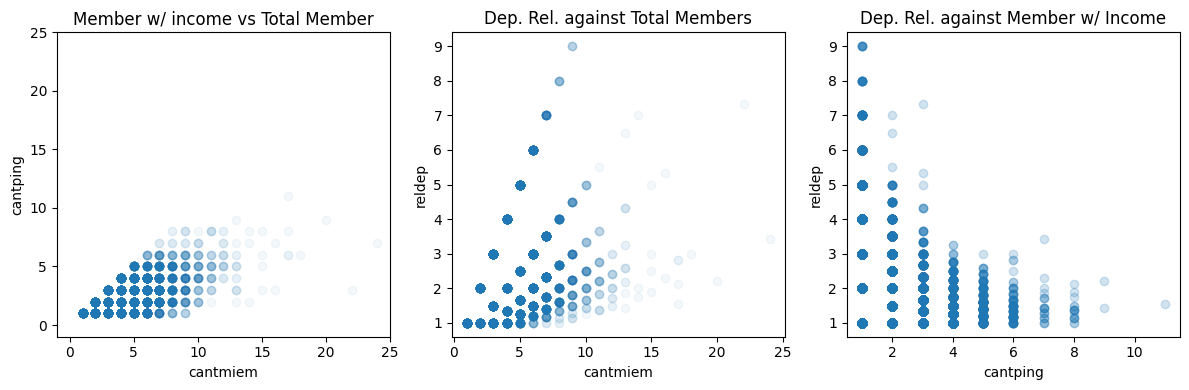

In [29]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].scatter(df.cantmiem, df.cantping, alpha=.05)
axs[0].set(ylim=(-1,25), xlim=(-1,25), xlabel='cantmiem', ylabel='cantping', title='Member w/ income vs Total Member')

axs[1].scatter(df.cantmiem, df.reldep, alpha=.05)
axs[1].set(xlabel='cantmiem', ylabel='reldep', title='Dep. Rel. against Total Members')

axs[2].scatter(df.cantping, df.reldep, alpha=.2)
axs[2].set(xlabel='cantping', ylabel='reldep', title='Dep. Rel. against Member w/ Income')

plt.tight_layout()

At first glance, we can notice:
- Among the 1 to 7-8 members that make up the vast majority of Argentine households, the number of members with income seems to grow linearly.
- The dependency ratio also increases with the size of households, as expected.
- There is a great variability in the dependency ratio for households with few people with income perception."

#### Income and Expenses per Number of members

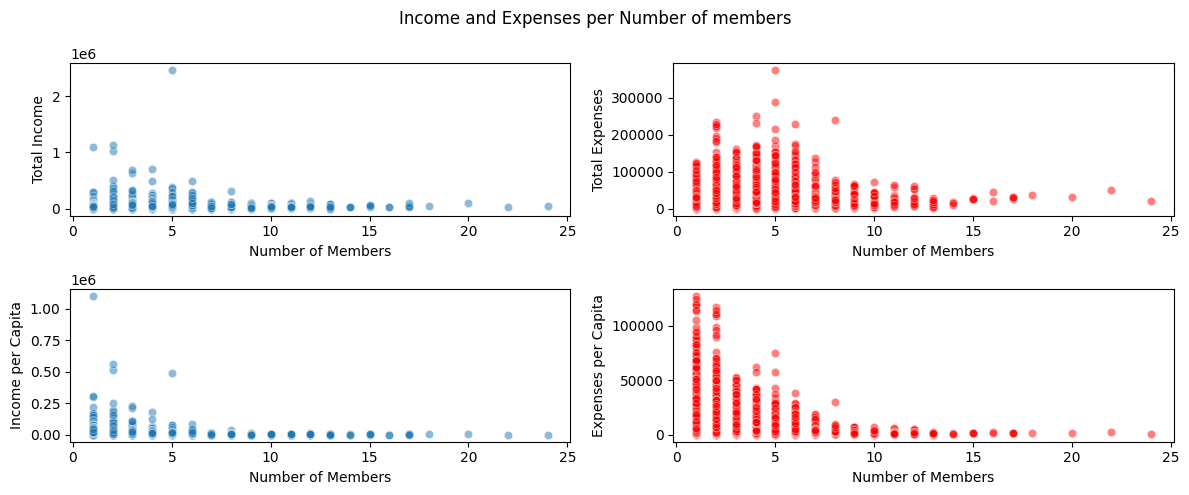

In [30]:
fig, axs = plt.subplots(2,2, figsize=(12,5))
fig.suptitle('Income and Expenses per Number of members')

sns.scatterplot(df, x='cantmiem', y='ingtoth', alpha=.5, ax=axs[0,0])
axs[0,0].set(ylabel='Total Income', xlabel='Number of Members')

sns.scatterplot(df, x='cantmiem', y='gastot', color='red', alpha=.5, ax=axs[0,1])
axs[0,1].set(ylabel='Total Expenses', xlabel='Number of Members')

sns.scatterplot(df, x='cantmiem', y='ingpch', alpha=.5, ax=axs[1,0])
axs[1,0].set(ylabel='Income per Capita', xlabel='Number of Members')

sns.scatterplot(df, x='cantmiem', y='gastotpc', color='red', alpha=.5, ax=axs[1,1])
axs[1,1].set(ylabel='Expenses per Capita', xlabel='Number of Members')

plt.tight_layout()

- Note the relative porverty (total income and expenses) for highly populated households

##### Log Scale

In [31]:
for col in ['ingtoth', 'ingpch', 'gastot', 'gastotpc']: 
    df['log_' + col] = df[col].apply(lambda x: np.log(x+1)) #log transformations

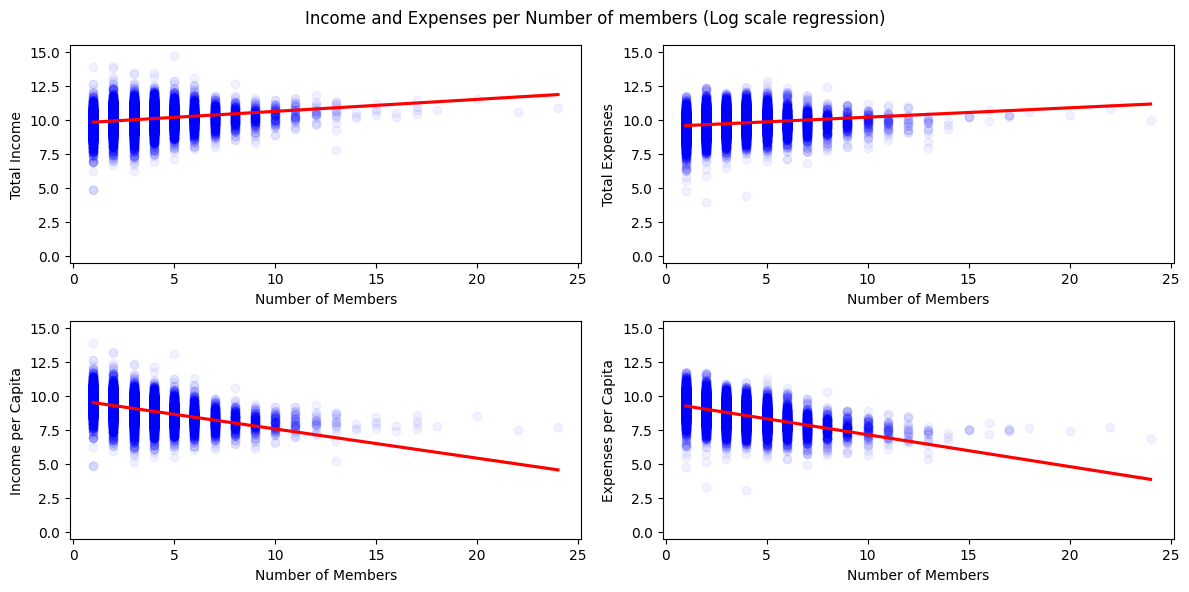

In [32]:
fig, axs = plt.subplots(2,2, figsize=(12,6))
fig.suptitle('Income and Expenses per Number of members (Log scale regression)')
sns.regplot(df, x='cantmiem', y='log_ingtoth', color='red', scatter_kws={'alpha': 0.05, 'color':'blue'}, ax=axs[0,0])
axs[0,0].set(ylabel='Total Income', xlabel='Number of Members', ylim=(-.5,15.5))

sns.regplot(df, x='cantmiem', y='log_gastot', color='red', scatter_kws={'alpha': 0.05, 'color':'blue'}, ax=axs[0,1])
axs[0,1].set(ylabel='Total Expenses', xlabel='Number of Members', ylim=(-.5,15.5))

sns.regplot(df, x='cantmiem', y='log_ingpch', color='red', scatter_kws={'alpha': 0.05, 'color':'blue'}, ax=axs[1,0])
axs[1,0].set(ylabel='Income per Capita', xlabel='Number of Members', ylim=(-.5,15.5))

sns.regplot(df, x='cantmiem', y='log_gastotpc', color='red', scatter_kws={'alpha': 0.05, 'color':'blue'}, ax=axs[1,1])
axs[1,1].set(ylabel='Expenses per Capita', xlabel='Number of Members', ylim=(-.5,15.5))

plt.tight_layout()

- As seen in the correlation map, total income and total expenses do not increase significantly as the number of members increases, despite the high correlation between the total number of members and the number of them who receive income. This partly explains the notable decrease in per capita income and expenses in households with increasingly more members.
- Note also that, naturally, these patterns do not fit correctly for excessively populated households, so an in-depth analysis would be necessary only for these cases.